In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pickle

In [2]:
RESULTS_DIR = "../results/"
FIGURES_DIR = "../figures/"

In [3]:
def load_model_stats(model_name):
    fname = RESULTS_DIR + model_name + "_stats.pkl"
    q = pickle.load(open(fname, "rb"), encoding="latin1")
    return q

def plot_stats(layers, stats, y_label, fname=None):
    plt.figure(figsize=(10,6))
    plt.plot(stats, marker='o')
    plt.xticks(np.arange(len(layers)), layers, rotation=70)
    plt.ylabel(y_label)
    plt.tight_layout()
    if fname is not None:
        plt.savefig(FIGURES_DIR + fname, format='pdf')

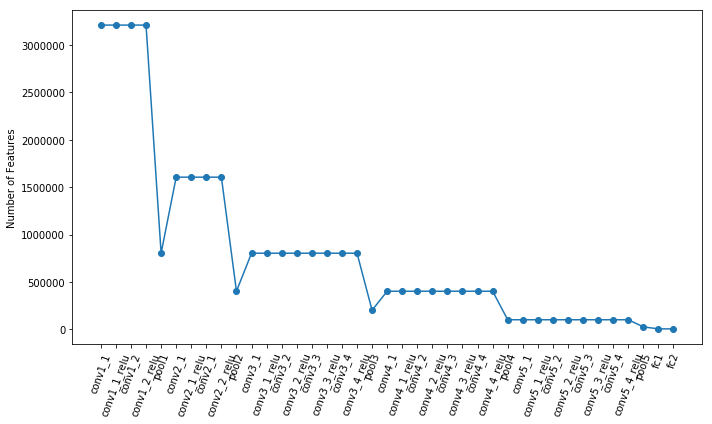

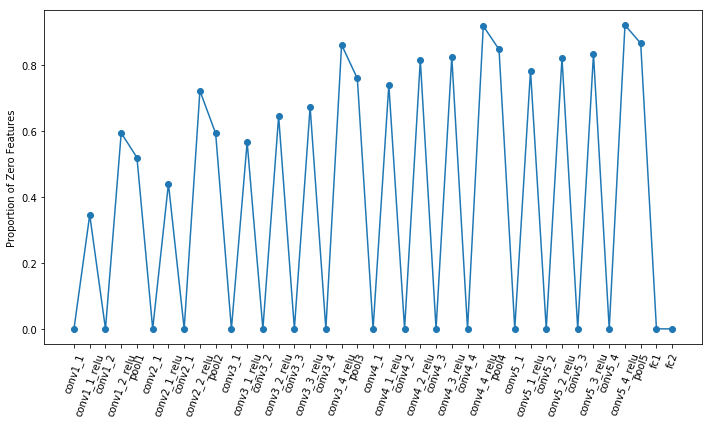

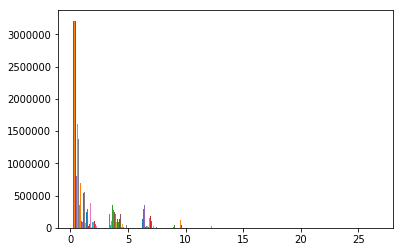

In [4]:
q = load_model_stats("vgg19")
layers_order = q["layers"]
n_feats_all = q["statistics"]["num_features"]
n_zero_mean_all = q["statistics"]["zero_mean_proportion"]
feature_stds = q["statistics"]["feature_stds"]

plot_stats(layers_order, n_feats_all, "Number of Features")
plot_stats(layers_order, n_zero_mean_all, "Proportion of Zero Features")

plt.figure()
plt.hist(feature_stds);

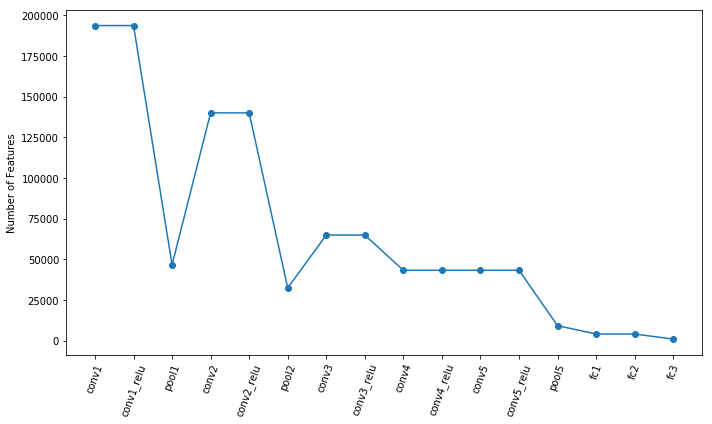

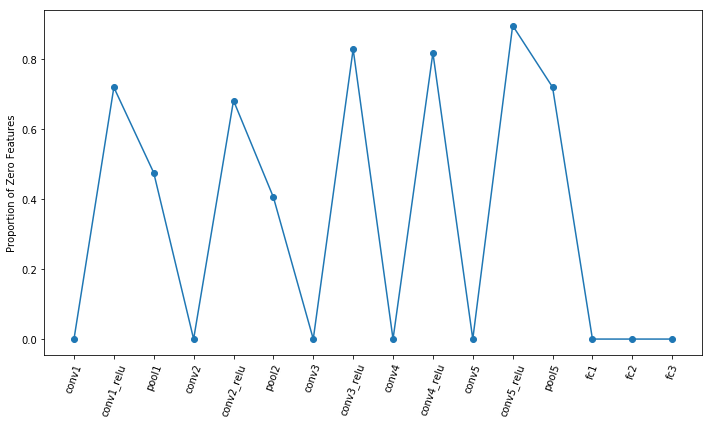

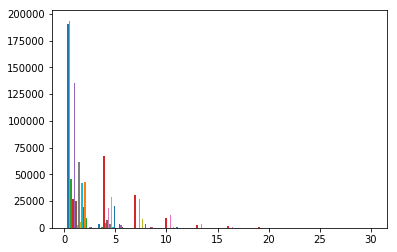

In [5]:
q = load_model_stats("alexnet")
layers_order = q["layers"]
n_feats_all = q["statistics"]["num_features"]
n_zero_mean_all = q["statistics"]["zero_mean_proportion"]
feature_stds = q["statistics"]["feature_stds"]

plot_stats(layers_order, n_feats_all, "Number of Features")
plot_stats(layers_order, n_zero_mean_all, "Proportion of Zero Features")

plt.figure()
plt.hist(feature_stds);